<a href="https://colab.research.google.com/github/AyaTaha16/Generative_AI_DEPI/blob/main/Auto_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import csv
import string
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras.optimizers import SGD , Adam , RMSprop
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets  download -d uciml/autompg-dataset
!unzip autompg-dataset.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/uciml/autompg-dataset
License(s): CC0-1.0
  0% 0.00/6.31k [00:00<?, ?B/s]
100% 6.31k/6.31k [00:00<00:00, 13.1MB/s]
Archive:  autompg-dataset.zip
  inflating: auto-mpg.csv            


In [ ]:
dataset= pd.read_csv("/content/auto-mpg.csv")
dataset=pd.DataFrame(dataset)

In [ ]:
print(dataset.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


In [ ]:
print(dataset.describe())

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


In [ ]:
print(dataset.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [ ]:
dataset = dataset.replace('?', np.nan)
print(dataset.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [ ]:
dataset= dataset.drop('car name', axis=1)
replace = dataset.fillna(dataset.median(), inplace=True)
print(dataset.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64


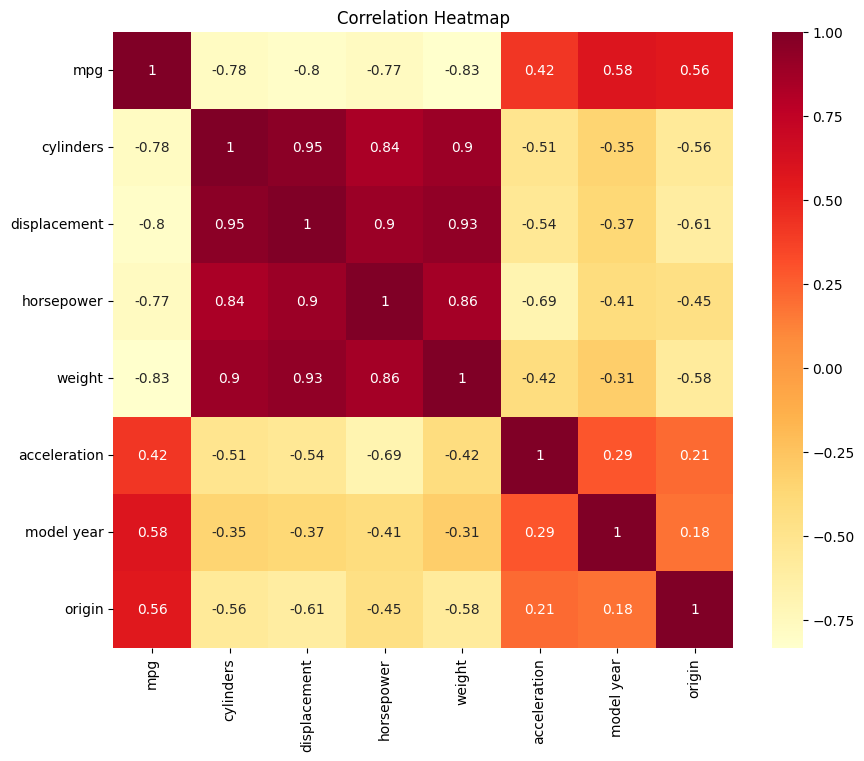

In [ ]:
# Calculate the correlation matrix
corr_matrix = dataset.corr()
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)
z_scores = np.abs(scaled_data)
# Define a threshold for outliers (e.g., 3 standard deviations)
threshold = 3
outlier_indices = np.where(z_scores > threshold)
# Remove outliers from the dataset
dataset = dataset.drop(dataset.index[outlier_indices[0]])


In [ ]:
n = dataset.nunique(axis=0)
print("No.of.unique values in each column :\n",n)

No.of.unique values in each column :
 mpg             128
cylinders         5
displacement     80
horsepower       91
weight          345
acceleration     92
model year       13
origin            3
dtype: int64


In [ ]:
X = dataset.drop('mpg', axis=1)
y = dataset['mpg']
model = LinearRegression()
# Apply Recursive Feature Elimination
rfe = RFE(model, n_features_to_select=5)
rfe = rfe.fit(X, y)
# Print the selected features
print("Selected Features:")
for i, feature in enumerate(X.columns):
    if rfe.support_[i]:
        print(feature)
columns_to_drop = ['displacement','weight']
dataset= dataset.drop(columns_to_drop, axis=1)

Selected Features:
cylinders
horsepower
acceleration
model year
origin


In [ ]:
X = dataset.drop('mpg', axis=1)
y = dataset['mpg']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = Sequential()
model.add(Dense(16, activation = 'relu', input_dim= X_train_scaled.shape[1]))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 16)                96        
                                                                 
 dense_47 (Dense)            (None, 8)                 136       
                                                                 
 dense_48 (Dense)            (None, 8)                 72        
                                                                 
 dense_49 (Dense)            (None, 1)                 9         
                                                                 
Total params: 313 (1.22 KB)
Trainable params: 313 (1.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
history = model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test), epochs =200)

Epoch 1/200
10/10 [==============================] - 1s 21ms/step - loss: 606.0486 - val_loss: 565.3624
Epoch 2/200
10/10 [==============================] - 0s 7ms/step - loss: 598.2580 - val_loss: 556.3940
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 588.8965 - val_loss: 545.5068
Epoch 4/200
10/10 [==============================] - 0s 11ms/step - loss: 577.7197 - val_loss: 532.3470
Epoch 5/200
10/10 [==============================] - 0s 12ms/step - loss: 563.8928 - val_loss: 516.4884
Epoch 6/200
10/10 [==============================] - 0s 12ms/step - loss: 546.5767 - val_loss: 497.2183
Epoch 7/200
10/10 [==============================] - 0s 11ms/step - loss: 525.2783 - val_loss: 473.4247
Epoch 8/200
10/10 [==============================] - 0s 10ms/step - loss: 499.8066 - val_loss: 444.5119
Epoch 9/200
10/10 [==============================] - 0s 5ms/step - loss: 469.1723 - val_loss: 410.1602
Epoch 10/200
10/10 [==============================] - 0s 12ms/step 

In [ ]:
# Evaluate the model
predictions = model.predict(X_test_scaled)
r2 = r2_score(y_test, predictions)
print("R2 Score:", r2)

3/3 [==============================] - 0s 4ms/step
R2 Score: 0.8426853406343153
